In [ ]:
from datasets import load_dataset

# download data from HF
dataset = load_dataset("s2orc", cache_dir = "/pfs/work7/workspace/scratch/tu_zxobe27-hiwi_project/data")

---

In [44]:
import os
# get all files
files = os.listdir(f"/pfs/work7/workspace/scratch/tu_zxobe27-hiwi_project/data/downloads/extracted/")

In [45]:
import pandas as pd
pd.read_json("/pfs/work7/workspace/scratch/tu_zxobe27-hiwi_project/data/downloads/extracted/"+ files[0])

,id,title,paperAbstract,authors,inCitations,outCitations,year,s2Url,sources,pdfUrls,...,journalName,journalVolume,journalPages,doi,doiUrl,pmid,fieldsOfStudy,magId,s2PdfUrl,entities
0,de3b3c5430c66c540587f880a96ad2c443623937,Dense Dermoids in Craniocervical Region,Computed tomography of dermoids and epidermoid...,"[{'name': 'A Cecchini', 'ids': ['1716008']}, ...","[410b08b8c8adf2cd2bacb79763b01cf5e748db56, 949...",[],1983.0,https://semanticscholar.org/paper/de3b3c5430c6...,[Medline],[],...,Journal of Computer Assisted Tomography,7,479–483,10.1097/00004728-198306000-00018,https://doi.org/10.1097/00004728-198306000-00018,6841712,[Medicine],2042748451,,[]
1,f9999da0cd8f4e3e82506a1add021771c5156af8,Electrically monitoring DNA repair by photolyase.,Cyclobutane pyrimidine dimers are the major DN...,"[{'name': 'Maria C DeRosa', 'ids': ['2413136']...","[42289fa10f07cb3eab91c8075ae3a1b31b388839, 474...","[d291565f2c52c358d17faf7d9aa159254ab8cc89, bcb...",2005.0,https://semanticscholar.org/paper/f9999da0cd8f...,[Medline],[http://www.cco.caltech.edu/~jkbgrp/abstracts/...,...,Proceedings of the National Academy of Science...,102 31,\n 10788-92\n,10.1073/PNAS.0503527102,https://doi.org/10.1073/PNAS.0503527102,16043698,"[Chemistry, Medicine]",2121054317,,[]
2,f8166838dbc5395c4cfcea11cd06f5d11f769012,The water and land footprints of meat and milk...,Food consumption and production are increasing...,"[{'name': 'Caroline Kerubo Bosire', 'ids': ['5...",[],[],2016.0,https://semanticscholar.org/paper/f8166838dbc5...,[],[],...,,,,10.3990/1.9789036542463,https://doi.org/10.3990/1.9789036542463,,[Geography],2560737320,,[]
3,3893124e65144c5f30ef6692fc9b360dd3772580,Scintillating and Nonscintillating AGNs: Their...,,"[{'name': 'T. Joseph W. Lazio', 'ids': ['14513...",[],[],2006.0,https://semanticscholar.org/paper/3893124e6514...,[],[],...,,,,,,,[Physics],1625134468,,[]
4,7a21873ea2a4db65549f87d78b12d3fbff5d73cc,경부고속선의 레일 연마에 따른 레일 피로수명 평가,The importance of maintenance of rail surface ...,"[{'name': '김만철', 'ids': ['72631357']}, {'name'...",[],[],2010.0,https://semanticscholar.org/paper/7a21873ea2a4...,[],[],...,,13,577-582,,,,[Engineering],2160368416,,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31617,56bb32b5b9cd045429f3ae16105bc4fccd407664,OS GESTOS DIDÁTICOS NO ENSINO DE GÊNEROS DE TEXTO,,"[{'name': 'Ribamar Ferreira de Oliveira', 'ids...",[],[],2019.0,https://semanticscholar.org/paper/56bb32b5b9cd...,[],[],...,,,93-107,10.22533/at.ed.71119250110,https://doi.org/10.22533/at.ed.71119250110,,[],2912249077,,[]
31618,871162f47d8c7c6367f5e14a780efee2a9202203,【個別送料1000円】【直送品】 ダイケン マテハンMTH3 アルミレール3m シルバー M...,,"[{'name': '名和 小太郎', 'ids': ['66465889']}]",[],"[d8b449f01fce4dd8d5e5961dc10c2c8920df0a05, 53e...",2015.0,https://semanticscholar.org/paper/871162f47d8c...,[],[],...,Journal of Information Processing and Management,58,389-392,10.1241/JOHOKANRI.58.389,https://doi.org/10.1241/JOHOKANRI.58.389,,[Computer Science],2890379765,,[]
31619,9fd5d5c7f21e49ecb0f322c42ad9b922e96eb87d,From Pamphlets to Podcasts: Health Information...,This paper outlines the development of informa...,"[{'name': 'Beki Moult', 'ids': ['5566121']}, ...","[876f7dca85e9a064b99ef8b25c3ee2c7ec853a80, 97d...","[fe77996155c2e7dd1e02ac517422722db5bb9dc2, 533...",2009.0,https://semanticscholar.org/paper/9fd5d5c7f21e...,[Medline],[https://www.gosh.nhs.uk/file/711/download],...,Journal of Visual Communication in Medicine,32,43 - 47,10.1080/17453050903028885,https://doi.org/10.1080/17453050903028885,20014965,[Medicine],2053091129,,[]
31620,b8e8b5d3508b70a0d427a43248c04dbb086e72a1,Seismicity and structure of the Indian subcontin,,"[{'name': 'J R Kayal and Simanchal Padhy', 'id...",[],[],2020.0,https://semanticscholar.org/paper/b8e8b5d3508b...,[],[],...,Episodes,43,650-664,10.18814/epiiugs/2020/020043,https://doi.org/10.18814/epiiugs%2F2020%2F020043,,[Geology],3012561106,,[]


In [3]:
from tqdm import tqdm
from multiprocessing import Pool

# remove odd linebreaks on unicode/hex level
def _foo(i):
    with open("/pfs/work7/workspace/scratch/tu_zxobe27-hiwi_project/data/downloads/extracted/" + files[i], "r") as file:
        tmp = file.read()
    with open("/pfs/work7/workspace/scratch/tu_zxobe27-hiwi_project/data/downloads/extracted/" + files[i], "w") as file:
        file.write(bytearray.fromhex(tmp.encode('utf-8').hex().replace("5c6e", "20")).decode())
        
with Pool(8) as p:
    list(tqdm(p.imap(_foo, range(len(files))), total = len(files)))

100%|██████████| 6000/6000 [30:34<00:00,  3.27it/s]


In [15]:
# turn into single JSON, not lines
def _foo(i):
    with open("/pfs/work7/workspace/scratch/tu_zxobe27-hiwi_project/data/downloads/extracted/" + files[i], "r") as file:
        tmp = file.read()
    with open("/pfs/work7/workspace/scratch/tu_zxobe27-hiwi_project/data/downloads/extracted/" + files[i], "w") as file:
        file.write("[" + tmp.replace("}\n{", "},{") + "]")
        
with Pool(8) as p:
    list(tqdm(p.imap(_foo, range(len(files))), total = len(files)))

100%|██████████| 5699/5699 [22:11<00:00,  4.28it/s]


In [10]:
# try and read using Pandas
def _foo(i):
    try:
        pd.read_json("/pfs/work7/workspace/scratch/tu_zxobe27-hiwi_project/data/downloads/extracted/" + files[i])
        return ""
    except:
        return "/pfs/work7/workspace/scratch/tu_zxobe27-hiwi_project/data/downloads/extracted/" + files[i]
        
        
with Pool(8) as p:
    faulties = list(tqdm(p.imap(_foo, range(len(files))), total = len(files)))

100%|██████████| 5699/5699 [36:54<00:00,  2.57it/s] 


In [ ]:
# move faulties to different folder (there were none)

---

In [ ]:
import dask.dataframe as dd

data = dd.read_json("/pfs/work7/workspace/scratch/tu_zxobe27-hiwi_project/data/downloads/extracted")

In [ ]:
data.query("year >= 2010").to_csv("/pfs/work7/workspace/scratch/tu_zxobe27-hiwi_project/data/reduced")

### Filter faulty csv files

In [8]:
import os
import pandas as pd
import os
files = os.listdir(f"/pfs/work7/workspace/scratch/tu_zxobe27-hiwi_project/data/reduced/")

In [15]:
from tqdm import tqdm
from multiprocessing import Pool


def _foo(i):
    try:
        pd.read_csv("/pfs/work7/workspace/scratch/tu_zxobe27-hiwi_project/data/reduced/" + files[i])
        return ""
    except:
        return "/pfs/work7/workspace/scratch/tu_zxobe27-hiwi_project/data/reduced/" + files[i]
        
        
with Pool(8) as p:
    faulties = list(tqdm(p.imap(_foo, range(len(files))), total = len(files)))

100%|██████████| 5698/5698 [03:06<00:00, 30.53it/s]


In [36]:
import shutil
test = pd.Series(faulties)
test[~(test == "")].str.extract(r"(\d\d\d\d\.part)")[0].apply(lambda x: shutil.move("/pfs/work7/workspace/scratch/tu_zxobe27-hiwi_project/data/reduced/" + x,
                                                                                 "/pfs/work7/workspace/scratch/tu_zxobe27-hiwi_project/data/reduced_faulty/" + x))

11      /pfs/work7/workspace/scratch/tu_zxobe27-hiwi_p...
15      /pfs/work7/workspace/scratch/tu_zxobe27-hiwi_p...
17      /pfs/work7/workspace/scratch/tu_zxobe27-hiwi_p...
19      /pfs/work7/workspace/scratch/tu_zxobe27-hiwi_p...
24      /pfs/work7/workspace/scratch/tu_zxobe27-hiwi_p...
                              ...                        
5662    /pfs/work7/workspace/scratch/tu_zxobe27-hiwi_p...
5666    /pfs/work7/workspace/scratch/tu_zxobe27-hiwi_p...
5676    /pfs/work7/workspace/scratch/tu_zxobe27-hiwi_p...
5680    /pfs/work7/workspace/scratch/tu_zxobe27-hiwi_p...
5697    /pfs/work7/workspace/scratch/tu_zxobe27-hiwi_p...
Name: 0, Length: 711, dtype: object

---
## Work with filtered data

In [ ]:
import dask.dataframe as dd
data = dd.read_csv("/pfs/work7/workspace/scratch/tu_zxobe27-hiwi_project/data/reduced/*")

In [38]:
data.shape[0].compute()

70390378

#### Test the format of Journal Names

In [4]:
journals = data.journalName.unique().compute()

In [7]:
journals.to_csv("/pfs/work7/workspace/scratch/tu_zxobe27-hiwi_project/data/journals.csv")

In [16]:
journals.loc[((journals.str.contains(r"^Academy of Management Journal$")) & (~journals.isna()))]

25688    Academy of Management Journal
Name: journalName, dtype: object

#### Filter data for FT50 journals

In [1]:
ft50 = ["Academy of Management Journal","Academy of Management Review","Accounting","Organizations and Society","Administrative Science Quarterly","American Economic Review","Contemporary Accounting Research","Econometrica","Entrepreneurship Theory and Practice","Harvard Business Review","Human Relations","Human Resource Management","Information Systems Research","Journal of Accounting and Economics","Journal of Accounting Research","Journal of Applied Psychology","Journal of Business Ethics","Journal of Business Venturing","Journal of Consumer Psychology","Journal of Consumer Research","Journal of Finance","Journal of Financial and Quantitative Analysis","Journal of Financial Economics","Journal of International Business Studies","Journal of Management","Journal of Management Information Systems","Journal of Management Studies","Journal of Marketing","Journal of Marketing Research","Journal of Operations Management","Journal of Political Economy","Journal of the Academy of Marketing Science","Management Science","Manufacturing and Service Operations Management","Marketing Science","MIS Quarterly","Operations Research","Organization Science","Organization Studies","Organizational Behavior and Human Decision Processes","Production and Operations Management","Quarterly Journal of Economics","Research Policy","Review of Accounting Studies","Review of Economic Studies","Review of Finance","Review of Financial Studies","Sloan Management Review","Strategic Entrepreneurship Journal","Strategic Management Journal","The Accounting Review"]

In [4]:
mask = data.journalName.isin(ft50)

In [5]:
subset = data[mask]
subset.to_csv("/pfs/work7/workspace/scratch/tu_zxobe27-hiwi_project/data/filtered")

['/pfs/work7/workspace/scratch/tu_zxobe27-hiwi_project/data/filtered/0000.part',
 '/pfs/work7/workspace/scratch/tu_zxobe27-hiwi_project/data/filtered/0001.part',
 '/pfs/work7/workspace/scratch/tu_zxobe27-hiwi_project/data/filtered/0002.part',
 '/pfs/work7/workspace/scratch/tu_zxobe27-hiwi_project/data/filtered/0003.part',
 '/pfs/work7/workspace/scratch/tu_zxobe27-hiwi_project/data/filtered/0004.part',
 '/pfs/work7/workspace/scratch/tu_zxobe27-hiwi_project/data/filtered/0005.part',
 '/pfs/work7/workspace/scratch/tu_zxobe27-hiwi_project/data/filtered/0006.part',
 '/pfs/work7/workspace/scratch/tu_zxobe27-hiwi_project/data/filtered/0007.part',
 '/pfs/work7/workspace/scratch/tu_zxobe27-hiwi_project/data/filtered/0008.part',
 '/pfs/work7/workspace/scratch/tu_zxobe27-hiwi_project/data/filtered/0009.part',
 '/pfs/work7/workspace/scratch/tu_zxobe27-hiwi_project/data/filtered/0010.part',
 '/pfs/work7/workspace/scratch/tu_zxobe27-hiwi_project/data/filtered/0011.part',
 '/pfs/work7/workspace/scrat

#### Analyze FT50 journal data

In [1]:
import dask.dataframe as dd
data_analysis = dd.read_csv("/pfs/work7/workspace/scratch/tu_zxobe27-hiwi_project/data/filtered/*").compute()

In [19]:
data_analysis = data_analysis.query("year < 2021")

In [43]:
data_analysis[(~ data_analysis.paperAbstract.isna())]

,Unnamed: 0.1,Unnamed: 0,id,title,paperAbstract,year,journalName,doi,detected,detected_statistics
0,1308,2832,fcc3628c81c19bb1dd40bc77d809ab6c066be38b,The Operational Impact of Organizational Commu...,Organizations are increasingly making use of c...,2015.0,Journal of Management,10.1177/0149206314545087,False,False
1,2718,5884,831294ba13b936e9a1fd77a8a57a6ff24c666940,Exploring the Relationship between Varieties o...,Prior research has indicated that greater diet...,2017.0,Journal of Marketing Research,10.1509/jmr.15.0206,False,False
2,2829,6134,e40f7fff9091893aa3fc109d0a1149b2440c9f0b,Executive Compensation and Firm Leverage. A Po...,This paper surveys the literature that studies...,2017.0,Accounting,10.2139/ssrn.2992766,False,False
3,8876,19884,05964f6018771aeec2b690221ed2fb6a7278a6c9,Positive Shock: A Consumer Ethical Judgement P...,Existing debates on business ethics under-repr...,2019.0,Journal of Business Ethics,10.1007/S10551-018-4092-Y,False,False
0,2080,4807,63053c31884a429f0ede442af0a98f7ab4ee06c1,Economic perspectives on the development of co...,Rival firms produce products with a variety of...,2010.0,Research Policy,10.1016/J.RESPOL.2010.05.006,False,False
...,...,...,...,...,...,...,...,...,...,...
6,13231,29682,9ab9fcbd85ef6c368f80173c550b8ee3f2b5e24d,The Double-edged Sword of Oppositional Categor...,To gain attention and build support for new ca...,2020.0,Administrative Science Quarterly,10.1177/0001839220914855,False,False
0,4841,10755,677816b36825e3882ade27937659952e6363e929,"Business Group Affiliation, Performance, Conte...",Research on business groups—legally independen...,2011.0,Academy of Management Journal,10.5465/AMJ.2011.61967812,False,False
2,10700,23689,139d4c1a37e18c4b6db20807ed3e31136df268d8,Nonlinear Tax Incidence and Optimal Taxation i...,We study the incidence and the optimal design ...,2020.0,Econometrica,10.3982/ECTA14681,False,False
3,11203,24840,2ad495d24d1041d9a60edbb5a7b7ee59683a0409,Multinational Corporations and Governance Effe...,Multinational corporations (MNCs) dominate the...,2015.0,Journal of Business Ethics,10.1007/S10551-014-2358-6,False,False


In [2]:
# share of missing values
data_analysis.paperAbstract.isna().sum() / data_analysis.shape[0]

0.13739194408681257

In [31]:
# define search terms and assemble regex
search_terms = ["regression",
                "difference.in.difference",
                "natural.experiment",
                "statistics"]
search_regex = "|".join([f"({term})" for term in search_terms])
search_regex = f"({search_regex})"

In [32]:
# write columns for those detected
data_analysis["detected_statistics"] = (data_analysis.title.str.contains(search_regex, case = False) |
                                        data_analysis.paperAbstract.str.contains(search_regex, case = False))

/scratch/slurm_tmpdir/job_21985387/ipykernel_561243/909036626.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data_analysis["detected_statistics"] = (data_analysis.title.str.contains(search_regex, case = False) |
/scratch/slurm_tmpdir/job_21985387/ipykernel_561243/909036626.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data_analysis.paperAbstract.str.contains(search_regex, case = False))


In [22]:
# define search terms and assemble regex
search_terms = ["machine.learning",
                "deep.learning",
                "neural.network",
                "artificial.neural.network",
                "artificial.intelligence",
                "reinforcement.learning",
                "(post.){,1}lasso",
                "random.forest",
                "causal.forest",
                "regression.forest",
                "boosted.forest",
                "support.vector.machine"]
search_regex = "|".join([f"({term})" for term in search_terms])
search_regex = f"({search_regex})"

In [23]:
# write columns for those detected
data_analysis["detected"] = (data_analysis.title.str.contains(search_regex, case = False) |
                             data_analysis.paperAbstract.str.contains(search_regex, case = False))

/scratch/slurm_tmpdir/job_21985387/ipykernel_561243/4043690860.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data_analysis["detected"] = (data_analysis.title.str.contains(search_regex, case = False) |
/scratch/slurm_tmpdir/job_21985387/ipykernel_561243/4043690860.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data_analysis.paperAbstract.str.contains(search_regex, case = False))


In [24]:
data_analysis.detected_statistics.sum()

872

In [25]:
data_analysis.detected.sum()

81

Text(0, 0.5, '')

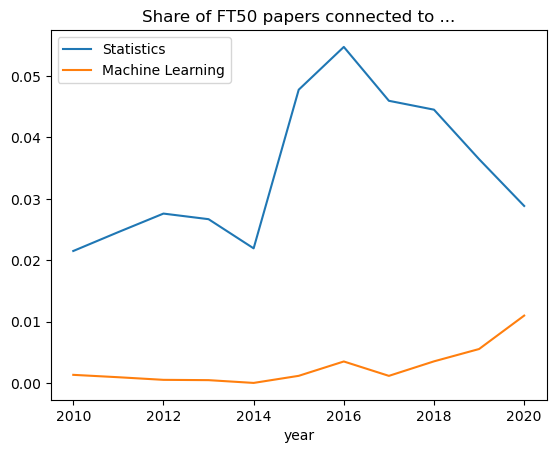

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
sns.lineplot(data = data_analysis, x = "year", y = "detected_statistics", label = "Statistics", errorbar = None, ax = ax)
sns.lineplot(data = data_analysis, x = "year", y = "detected", label = "Machine Learning", errorbar = None, ax = ax)

ax.set_title("Share of FT50 papers connected to ...")
ax.set_ylabel("")

In [38]:
fig.savefig("/pfs/work7/workspace/scratch/tu_zxobe27-hiwi_project/ML-in-Business-Economics/ft50_occurence.png")